# Results

In [167]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [168]:
gcp_results_path = "gcp_results.csv"
df = pd.read_csv(gcp_results_path, sep=";")
df["Core"] = df["Core"].where(df["Scenario"] != "Sequenziale", 1)

df["Core"] = df["Core"].astype(int)
df["Nodi Gestore"] = df["Nodi Gestore"].astype(int)
df["Nodi Worker"] = df["Nodi Worker"].astype(int)


In [169]:
kmeans = df.drop(columns=["KCenter - Mean"]).drop(columns=["KCenter - Std"])
kmeans = kmeans.rename(columns={"KMeans - Mean": "Mean", "KMeans - Std": "Std"})
kmeans = kmeans[kmeans["Dataset"] != "Italia"]
kmeans["Mean"] = kmeans["Mean"].astype(float).round(2)
kmeans["Std"] = kmeans["Std"].astype(float).round(2)

km_aosta = kmeans[kmeans["Dataset"] == "Aosta"].drop(columns=["Dataset"])
km_umbria = kmeans[kmeans["Dataset"] == "Umbria"].drop(columns=["Dataset"])
km_roma = kmeans[kmeans["Dataset"] == "Roma"].drop(columns=["Dataset"])

kcenter = df.drop(columns=["KMeans - Mean"]).drop(columns=["KMeans - Std"])
kcenter = kcenter.rename(columns={"KCenter - Mean": "Mean", "KCenter - Std": "Std"})

kc_aosta = kcenter[kcenter["Dataset"] == "Aosta"].drop(columns=["Dataset"])
kc_umbria = kcenter[kcenter["Dataset"] == "Umbria"].drop(columns=["Dataset"])
kc_roma = kcenter[kcenter["Dataset"] == "Roma"].drop(columns=["Dataset"])
kc_italia = kcenter[kcenter["Dataset"] == "Italia"].drop(columns=["Dataset"])

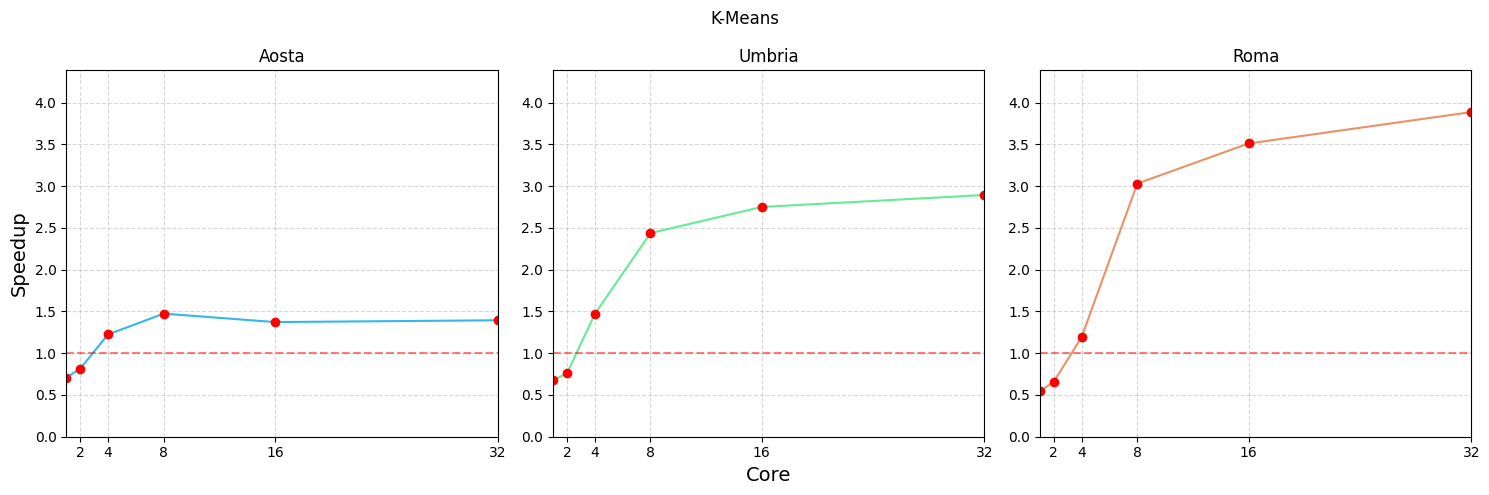

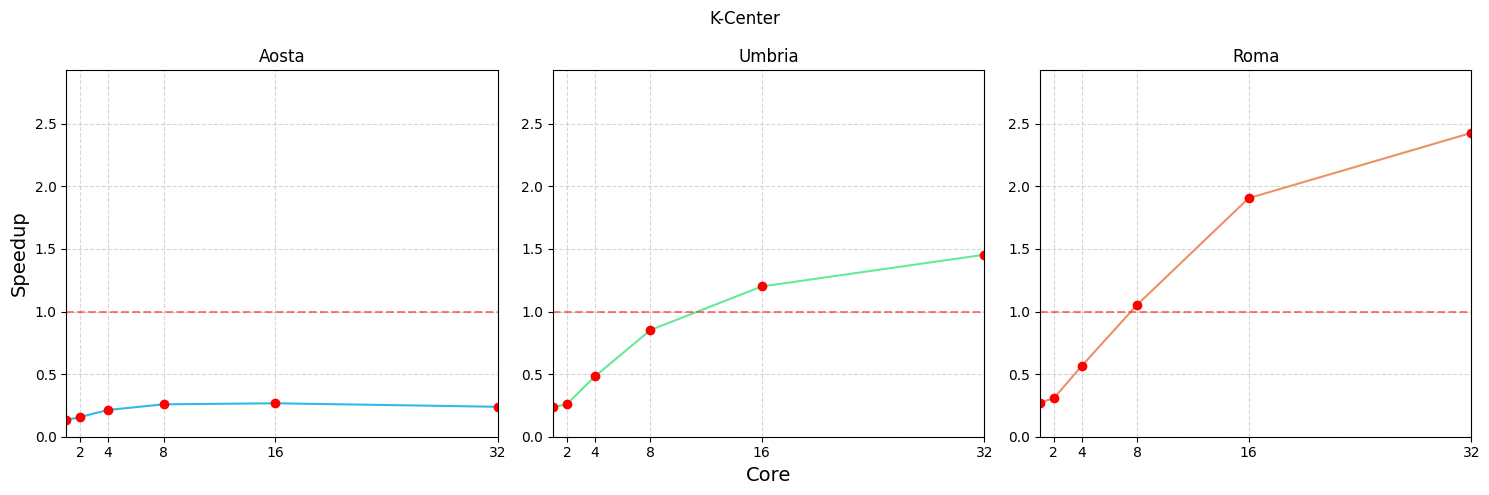

In [170]:
def plot_speedup(df_data, title):
    regions = ["Aosta", "Umbria", "Roma"]
    fig, ax = plt.subplots(1, len(regions), figsize=(15, 5))

    colors = ["#34b7eb", "#65eb96", "#eb9165"]

    max_speedup = 0
    for region in regions:
        data = df_data[df_data["Dataset"] == region]
        data = data[data["Scenario"] != "Distribuito"]
        seq_mean = data[data["Scenario"] == "Sequenziale"]["Mean"].values[0]
        data["Speedup"] = seq_mean / data["Mean"]
        max_speedup = max(max_speedup, data["Speedup"].max())

    for i, region in enumerate(regions):
        data = df_data[df_data["Dataset"] == region]
        seq_mean = data[data["Scenario"] == "Sequenziale"]["Mean"].values[0]
        data = data[data["Scenario"] != "Distribuito"]
        data = data[data["Scenario"] != "Sequenziale"]
        
        data["Speedup"] = seq_mean / data["Mean"]
        sns.lineplot(data=data, x="Core", y="Speedup", ax=ax[i], color=colors[i])
        ax[i].set_title(f"{region}")

        if i == 0:
            ax[i].set_ylabel("Speedup", fontsize=14)
        else:
            ax[i].set_ylabel("")

        if i == 1:
            ax[i].set_xlabel("Core", fontsize=14)
        else:
            ax[i].set_xlabel("")
            
        ax[i].set_xlim(1, 32)
        ax[i].set_xticks([2, 4, 8, 16, 32])

        ax[i].set_ylim(0, max_speedup + 0.5)

        for _, row in data.iterrows():
            ax[i].plot(row["Core"], row["Speedup"], "o", color="red")

        ax[i].grid(True, linestyle="--", alpha=0.5)
        ax[i].axhline(y=1.0, color="red", linestyle="--", alpha=0.5)

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_speedup(kmeans, "K-Means")
plot_speedup(kcenter, "K-Center")


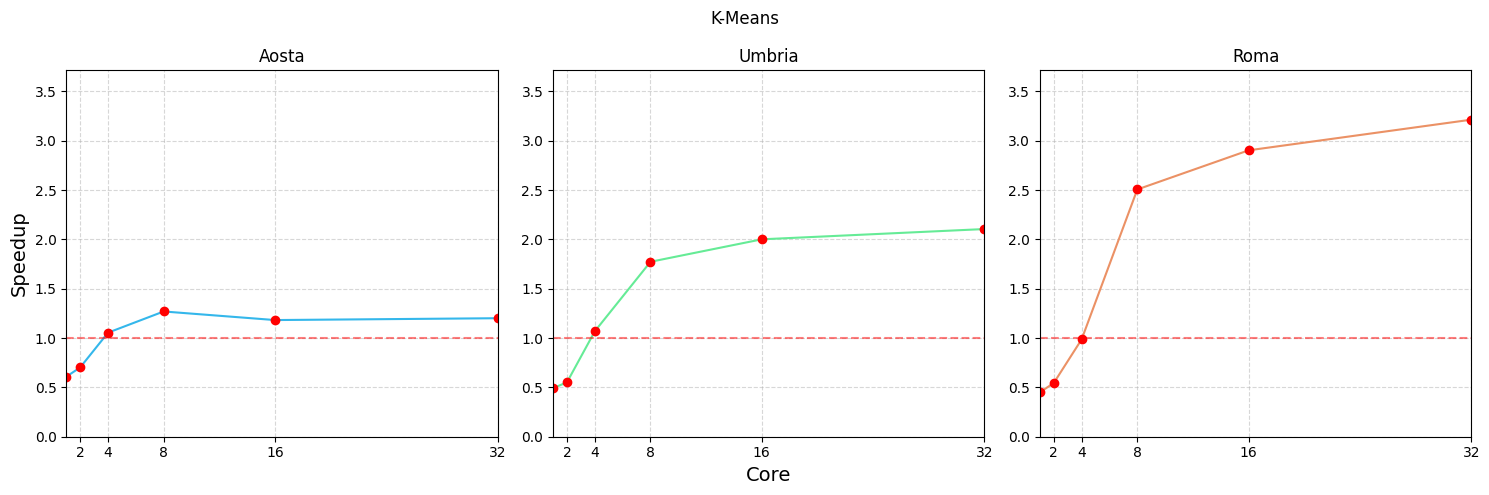

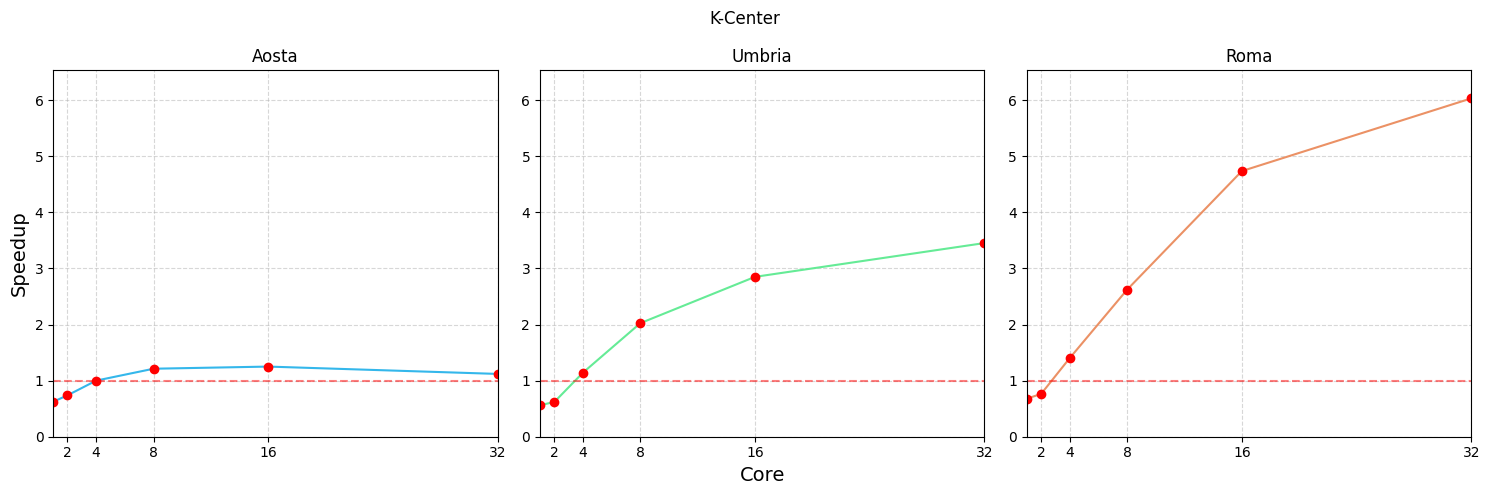

In [171]:
def plot_speedup_distribuito(df_data,title):
    regions = ["Aosta", "Umbria", "Roma"]
    fig, ax = plt.subplots(1, len(regions), figsize=(15, 5))

    colors = ["#34b7eb", "#65eb96", "#eb9165"]

    max_speedup = 0
    for region in regions:
        data = df_data[df_data["Dataset"] == region]
        data = data[data["Scenario"] != "Sequenziale"]
        dist_mean = data[data["Scenario"] == "Distribuito"]["Mean"].values[0]
        data["Speedup"] = dist_mean / data["Mean"]
        max_speedup = max(max_speedup, data["Speedup"].max())

    for i, region in enumerate(regions):
        data = df_data[df_data["Dataset"] == region]
        dist_mean = data[data["Scenario"] == "Distribuito"]["Mean"].values[0]
        data = data[data["Scenario"] != "Sequenziale"]
        data = data[data["Scenario"] != "Distribuito"]
        
        data["Speedup"] = dist_mean / data["Mean"]
        sns.lineplot(data=data, x="Core", y="Speedup", ax=ax[i], color=colors[i])
        ax[i].set_title(f"{region}")

        if i == 0:
            ax[i].set_ylabel("Speedup", fontsize=14)
        else:
            ax[i].set_ylabel("")

        if i == 1:
            ax[i].set_xlabel("Core", fontsize=14)
        else:
            ax[i].set_xlabel("")
            
        ax[i].set_xlim(1, 32)
        ax[i].set_xticks([2, 4, 8, 16, 32])

        ax[i].set_ylim(0, max_speedup + 0.5)

        for _, row in data.iterrows():
            ax[i].plot(row["Core"], row["Speedup"], "o", color="red")

        ax[i].grid(True, linestyle="--", alpha=0.5)
        ax[i].axhline(y=1.0, color="red", linestyle="--", alpha=0.5)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_speedup_distribuito(kmeans, "K-Means")
plot_speedup_distribuito(kcenter, "K-Center")

In [172]:
def plot_graphs(data, title):
    seq_mean = data[data["Scenario"] == "Sequenziale"]["Mean"].values[0]

    parallelo = data[data["Scenario"] == "Parallelo"]
    parallelo = parallelo.drop(columns=["Scenario"])

    distribuito = data[data["Scenario"] == "Distribuito"]
    distribuito = distribuito.drop(columns=["Scenario"])

    # Plot Parallelo
    plt.figure(figsize=(10, 5))
    plt.title("Parallelo")
    plt.xlabel("Core")
    plt.ylabel("Tempo (s)")
    sns.lineplot(x=parallelo["Core"], y=parallelo["Mean"], label="Parallelo")
    sns.lineplot(x=[min(parallelo["Core"]), max(parallelo["Core"])], y=[seq_mean]*2, color="r", linestyle="--", label="Sequenziale")
    sns.scatterplot(x=parallelo["Core"], y=parallelo["Mean"], color="red", zorder=10)

    plt.xscale('log')
    plt.xticks(sorted(set(parallelo["Core"])))
    plt.gca().set_xticklabels(sorted(set(parallelo["Core"])))

    # Calculate the interval of confidence using the standard deviation from the dataframe
    parallelo_ci = 1.96 * parallelo["Std"] / np.sqrt(len(parallelo))

    # Plot the interval of confidence
    sns.lineplot(x=parallelo["Core"], y=parallelo["Mean"], color=sns.color_palette()[0])
    plt.fill_between(parallelo["Core"], parallelo["Mean"] - parallelo_ci, parallelo["Mean"] + parallelo_ci, alpha=0.2, color=sns.color_palette()[0])

    xmin = parallelo["Core"].min()
    xmax = parallelo["Core"].max()
    plt.xlim(xmin, xmax)


    plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    plt.legend()
    plt.show()

    # Plot Distribuito
    plt.figure(figsize=(10, 5))
    plt.title("Distribuito")
    plt.xlabel("Nodi Worker")
    plt.ylabel("Tempo (s)")
    sns.lineplot(x=distribuito["Nodi Worker"], y=distribuito["Mean"], label="Distribuito")
    sns.lineplot(x=[min(distribuito["Nodi Worker"]), max(distribuito["Nodi Worker"])], y=[seq_mean]*2, color="r", linestyle="--", label="Sequenziale")
    sns.scatterplot(x=distribuito["Nodi Worker"], y=distribuito["Mean"], color="red", zorder=10)

    plt.xticks(sorted(set(distribuito["Nodi Worker"])))

    xmin = distribuito["Nodi Worker"].min()
    xmax = distribuito["Nodi Worker"].max()
    plt.xlim(xmin, xmax)

    # Calculate the interval of confidence using the standard deviation from the dataframe
    distribuito_ci = 1.96 * distribuito["Std"] / np.sqrt(len(distribuito))

    # Plot the interval of confidence
    sns.lineplot(x=distribuito["Nodi Worker"], y=distribuito["Mean"], color=sns.color_palette()[1])
    plt.fill_between(distribuito["Nodi Worker"], distribuito["Mean"] - distribuito_ci, distribuito["Mean"] + distribuito_ci, alpha=0.2, color=sns.color_palette()[1])

    plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    plt.legend()
    plt.show()

# Aosta

## Kmeans

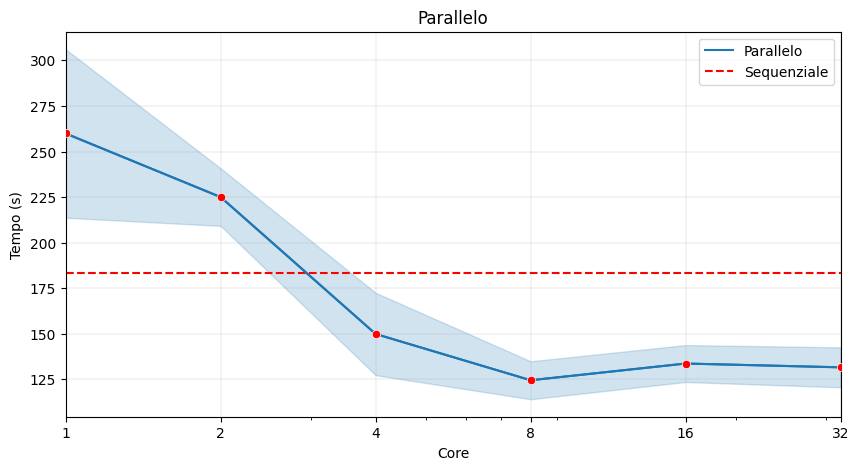

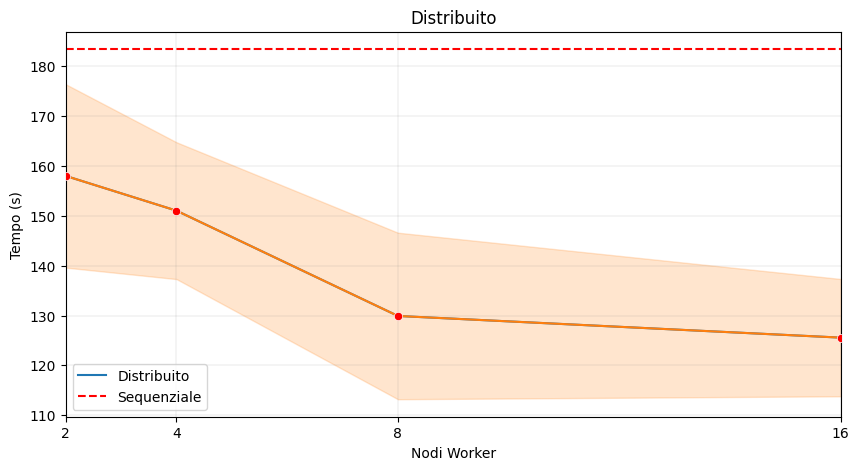

In [173]:
plot_graphs(km_aosta, "KMeans - Aosta")

## KCenter

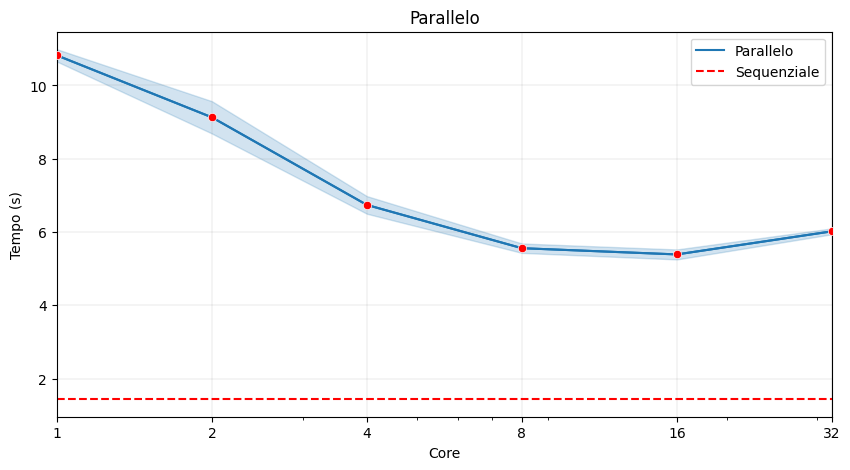

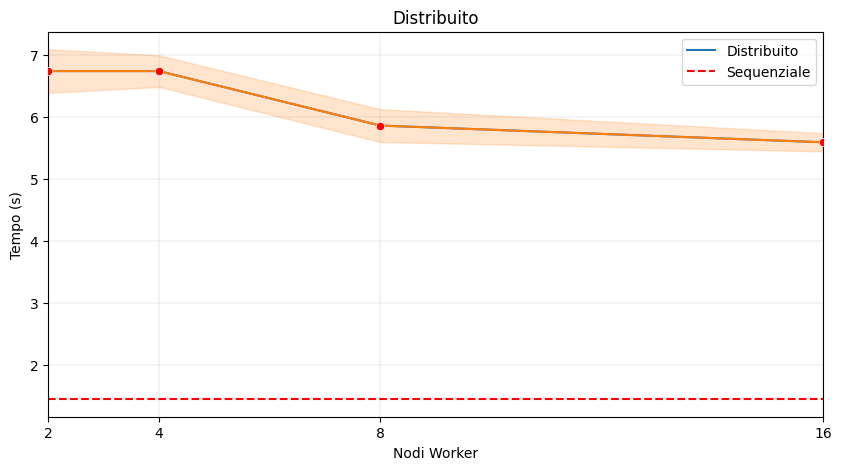

In [174]:
plot_graphs(kc_aosta, "KCenter - Aosta")

# Umbria

## KMeans

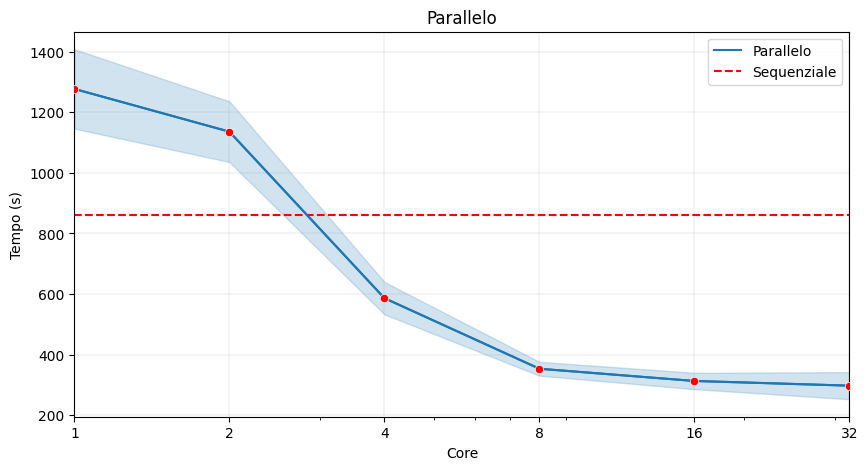

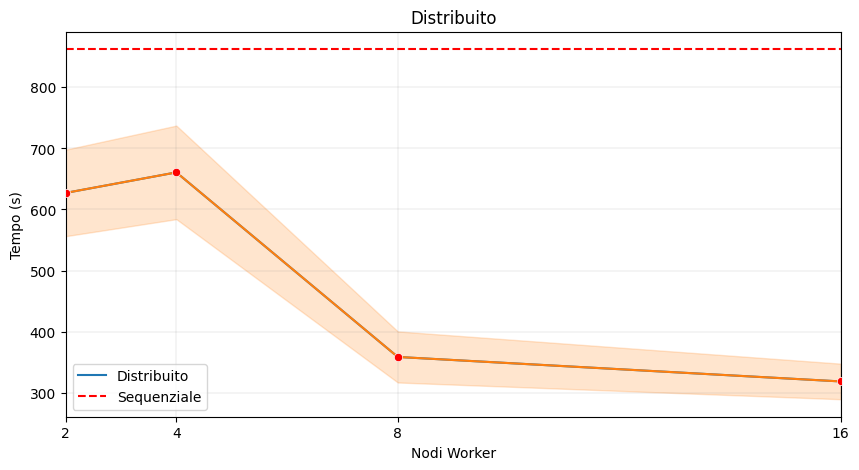

In [175]:
plot_graphs(km_umbria, "KMeans - Umbria")

## KCenter

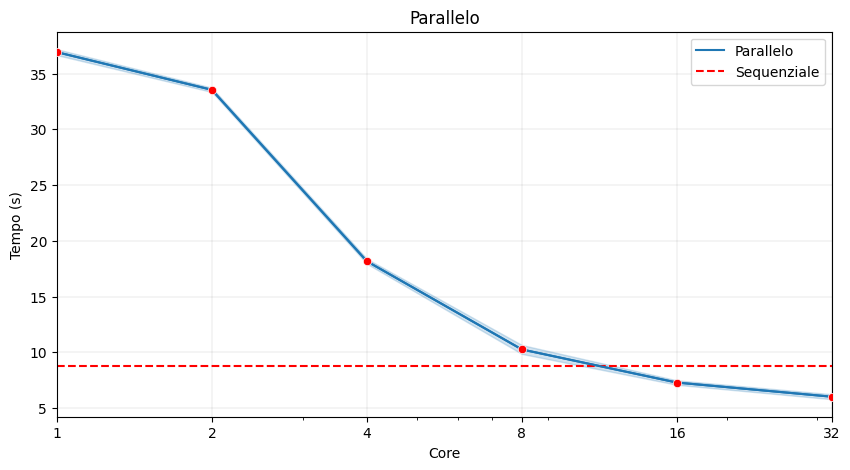

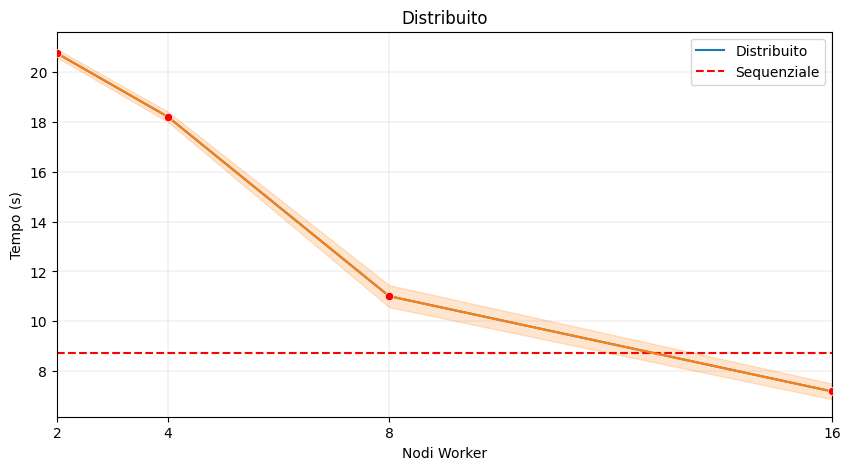

In [176]:
plot_graphs(kc_umbria, "KCenter - Umbria")

# Roma

## KMeans

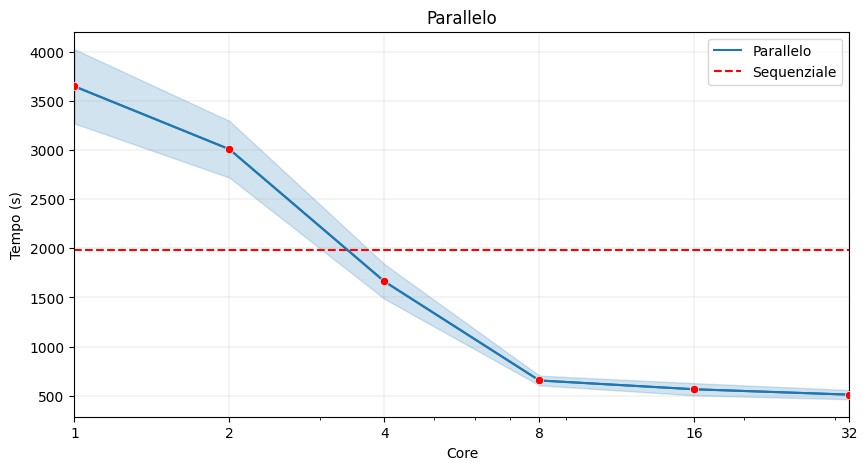

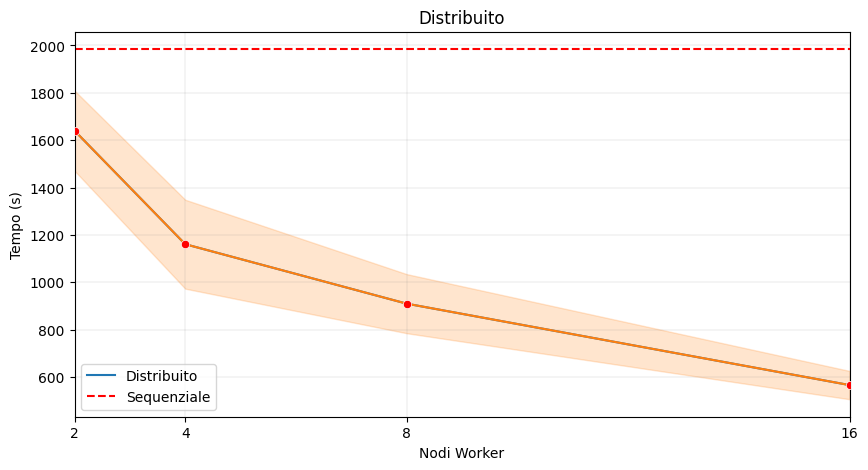

In [177]:
plot_graphs(km_roma, "KMeans - Roma")

## KCenter

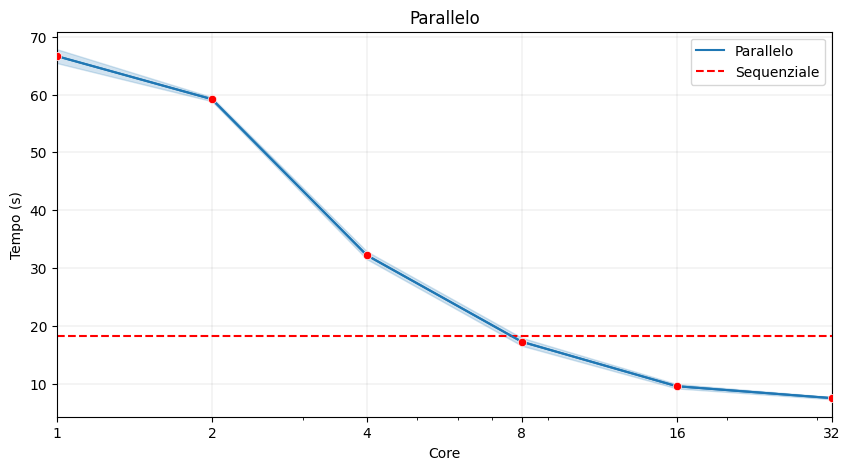

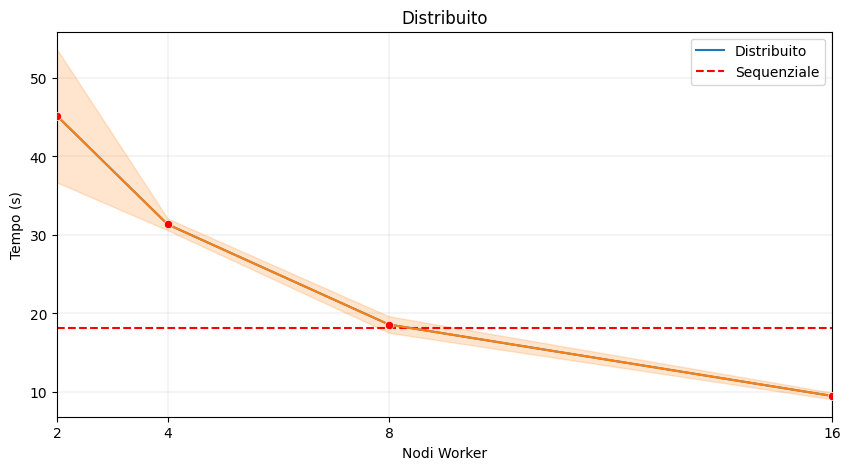

In [178]:
plot_graphs(kc_roma, "KCenter - Roma")

# Italia

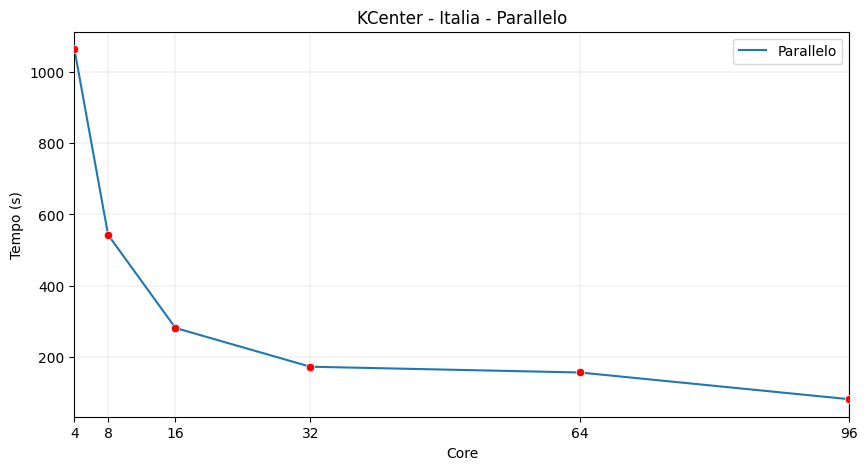

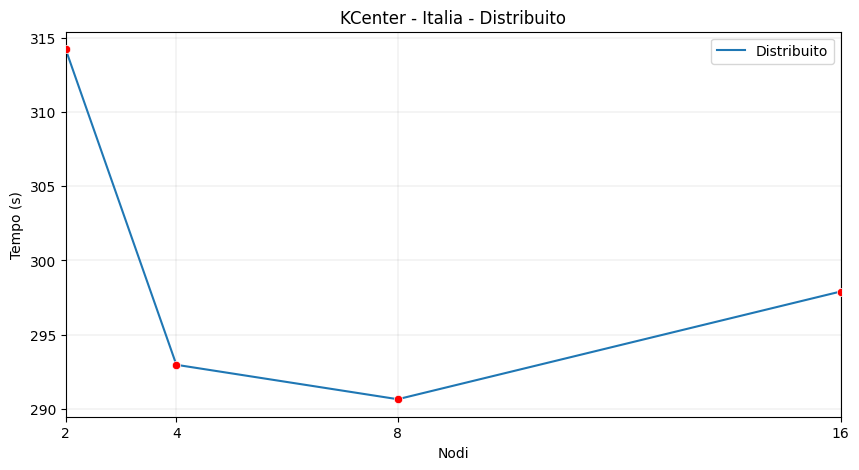

In [179]:
parallelo = kc_italia[kc_italia["Scenario"] == "Parallelo"]
parallelo = parallelo.drop(columns=["Scenario"])

plt.figure(figsize=(10, 5))
plt.title("KCenter - Italia - Parallelo")
plt.xlabel("Core")
plt.ylabel("Tempo (s)")

sns.lineplot(x=parallelo["Core"], y=parallelo["Mean"], label="Parallelo")
sns.scatterplot(x=parallelo["Core"], y=parallelo["Mean"], color="red", zorder=10)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.xticks(parallelo["Core"])

minCore = parallelo["Core"].min()
maxCore = parallelo["Core"].max()
plt.xlim(minCore, maxCore)
plt.legend()
plt.show()

distribuito = kc_italia[kc_italia["Scenario"] == "Distribuito"]
distribuito = distribuito.drop(columns=["Scenario"])

plt.figure(figsize=(10, 5))
plt.title("KCenter - Italia - Distribuito")
plt.xlabel("Nodi")
plt.ylabel("Tempo (s)")

sns.lineplot(x=distribuito["Nodi Worker"], y=distribuito["Mean"], label="Distribuito")
sns.scatterplot(x=distribuito["Nodi Worker"], y=distribuito["Mean"], color="red", zorder=10)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.xticks(distribuito["Nodi Worker"])

minNode = distribuito["Nodi Worker"].min()
maxNode = distribuito["Nodi Worker"].max()
plt.xlim(minNode, maxNode)
plt.legend()
plt.show()    